In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# packages for interactive plotting display
from IPython import display
import time

In [3]:
# Construct a 2D lennard jones fluid to experiment with
# Everything in lennard jones units (equilibrium distance and energy)
# NOTE: 2D volumes are actually areas V=L**2

In [4]:
# lennard jones energy
def calc_pair_energy(dist_a):
    # NaNs are used to represent the distance between an atom and itself
    E_a = dist_a**-12 - 2* dist_a**-6
    
    # Replace any NaNs with zero energy (ignore self-interaction energy)
    E_a[np.isnan(dist_a)] = 0.0
    return E_a

In [5]:
N = 20 # number of atoms
rho = 10.0 # number density of atoms
kT = 1.0

V = N*(1/rho)
L = V**(1/2)  # 2D volumes are really areas...

In [6]:
def min_img_dist(pos0_a,pos1_a,L):
    Ndim = 2
    dx_a = np.zeros(Ndim)
    for ind in range(Ndim):
        ix0 = pos0_a[ind]
        ix1 = pos1_a[ind]
        
        idx = ix0 - ix1
        idx_img = L + ix0 - ix1
        if np.abs(idx) < np.abs(idx_img):
            dx_a[ind] = idx
        else:
            dx_a[ind] = idx_img
            
            
    dist2 = 0
    for ind in range(Ndim):
        dist2 += dx_a[ind]**2
        
    dist = np.sqrt(dist2)
    return dist

def calc_pair_dist(iatom, pos_a, L):
    if ipos_a is None:
        ipos_a = pos_a[iatom]
        
    N = pos_a.shape[0]
    dist_a = np.zeros(N)
    
    for j in range(N):
        ijdist = min_img_dist(ipos_a,pos_a[j],L)
        if ijdist==0:
            ijdist = np.nan
            
        dist_a[j] = ijdist
        
    return dist_a
        

In [7]:
# Consider ideal gas without any interaction energies

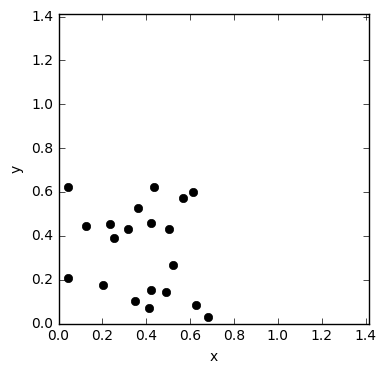

In [8]:
# Choose initial random positions and plot
pos_a = L/2*np.random.rand(N,2)

# Plot config
plt.plot(pos_a[:,0],pos_a[:,1],'ko')
plt.xlim(0,L)
plt.ylim(0,L)

plt.axes().set_aspect('equal') # make sure it plots as a square
plt.xlabel('x')
plt.ylabel('y')


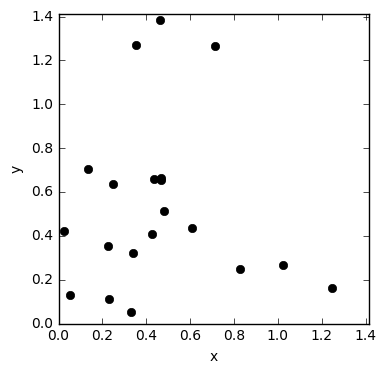

In [9]:
# Consider random alterations to atomic positions
Nsweep = 100
dr_avg = (1/rho)**(1/2)
dr_step = 0.1*dr_avg

for indsweep in range(Nsweep):
    for iatom in range(N):
        # Generate random step from normal distribution
        dpos_step_a = dr_step*np.random.randn(2)
        ipos_prop_a = pos_a[iatom] + dpos_step_a 
        # Ensure that the atoms lie within the simulation cell wrapping across edges of the box
        # Use modulo function
        ipos_prop_a = np.mod( ipos_prop_a ,L)
        
        # for ideal gas, always accept proposal, since Epair = 0 for ideal gas
        pos_a[iatom] = ipos_prop_a
        
    plt.cla()
    plt.plot(pos_a[:,0],pos_a[:,1],'ko')
    plt.xlim(0,L)
    plt.ylim(0,L)

    plt.axes().set_aspect('equal') # make sure it plots as a square
    plt.xlabel('x')
    plt.ylabel('y')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.001)
    

In [25]:
# Metropolis-Hastings acceptance criteria
def metro_accept( dE_kT ):
    paccept = np.exp( - dE_kT )
    pdraw = np.random.rand(1)
    
    if pdraw <= paccept:
        accept = True
    else:
        accept = False
    #print(pdraw)
    return accept



In [29]:
# Test to see that results are reasonable
metro_test_a = []
for ind in range(10):
    metro_test_a.append([metro_accept(.1),metro_accept(.3), metro_accept(1), metro_accept(3)])
    
metro_test_a = np.array(metro_test_a)

print('Metropolis-Hastings Test')
print('---')
print('         dE/kT      ')
print('  0.1,  0.3,   1.0,   3.0')
print(metro_test_a)
            
    


Metropolis-Hastings Test
---
         dE/kT      
  0.1,  0.3,   1.0,   3.0
[[ True False False False]
 [ True  True False False]
 [False  True False False]
 [False  True False False]
 [ True  True  True False]
 [ True False False False]
 [ True  True False False]
 [ True  True  True  True]
 [ True  True  True False]
 [ True False False False]]


In [100]:
# Steps to create Monte Carlo atomic simulation code for lennard jones
# 0) Copy code from above for ideal gas atomic position changes
# 1) Calculate pair distances for current and proposed states(using calc_pair_dist function)
# 2) Use metro-acceptance function to determine whether to accept or reject proposal
# 3) If accept, store new position, otherwise leave unchanged

# Run code (with plotting commands, to show how atomic positions evolve with Lennard Jones
# interactions model


In [ ]:
# Now update code to store changes in energy and position as system evolves
# 0) define new pos_hist_a and Etot_hist_a arrays, as well as current energy variable Etot
# 1) begin by calculating energy of initial position array
# 2) Begin monte carlo for loop. Every time proposal is accepted, update energy variable
# 3) At the end of each sweep (through every atom in the box), store pos_a and Etot 
#    in pos_hist_a and Etot_hist_a
#
# 4) After monte carlo simulation, plot how total energy evolves during simulation
#     -> it should generally decrease until the system reaches equilibrium, where it will then
#        randomly fluctuate around an average value
# 5) Calculate the average nearest neighbor distance for each snapshot, and then plot how it 
#      evolves during the simulation
#     -> the average distance should aproach a value near the equilibrium value